In [50]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('bmh')

In [51]:
time = np.arange(19)

In [52]:
observed = np.array([9.6,
18.3,
29.0,
47.2,
71.1,
119.1,
174.6,
257.3,
350.7,
441.0,
513.3,
559.7,
594.8,
629.4,
640.8,
651.1,
655.9,
659.6,
661.8])

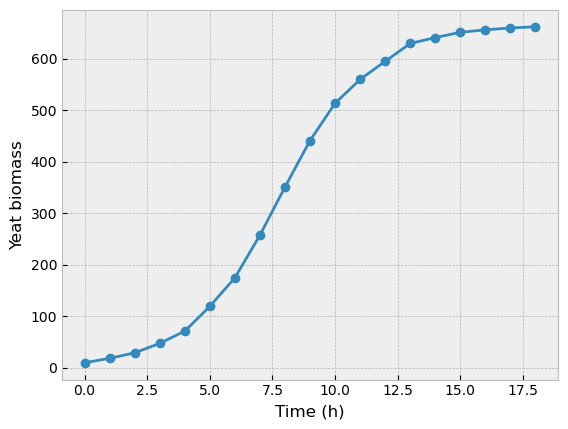

In [53]:
plt.plot(time, observed, marker="o")
plt.xlabel("Time (h)")
plt.ylabel("Yeat biomass")
plt.show()

In [54]:
M = 665
P = observed

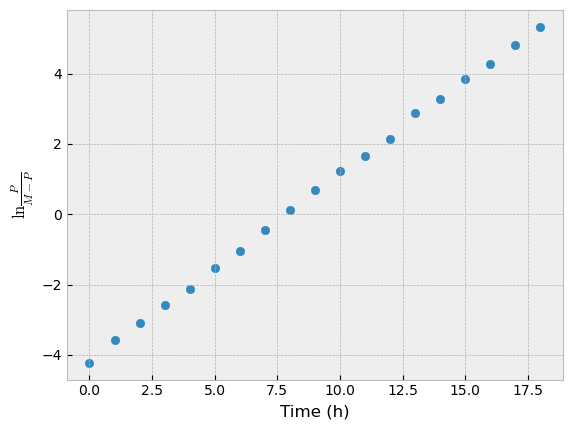

In [55]:
plt.scatter(time,np.log(P/(M-P)), marker = "o")
plt.xlabel("Time (h)")
plt.ylabel(r"${\rm{ln}}\frac{P}{M-P}$")
plt.show()

In [56]:
# first try numpy polyfit
slope, intercept = np.polyfit(time, np.log(P/(M-P)), deg=1)
slope, intercept

(0.5306746627219533, -4.163572101473056)

In [57]:
# then scipy linear regression
import scipy

In [58]:
scipy.stats.linregress(time, np.log(P/(M-P)))

LinregressResult(slope=0.5306746627219531, intercept=-4.163572101473055, rvalue=0.9998025122201444, pvalue=2.2433224210480064e-30, stderr=0.0025583109916853066, intercept_stderr=0.02695347880051371)

In [59]:
r = slope / M
r

0.0007980070116119599

In [60]:
P0 = M / (1 + np.exp(-intercept))
P0

10.183642179795761

In [61]:
P_pred = M*P0/(P0 + (M-P0)*np.exp(-r*M*time))

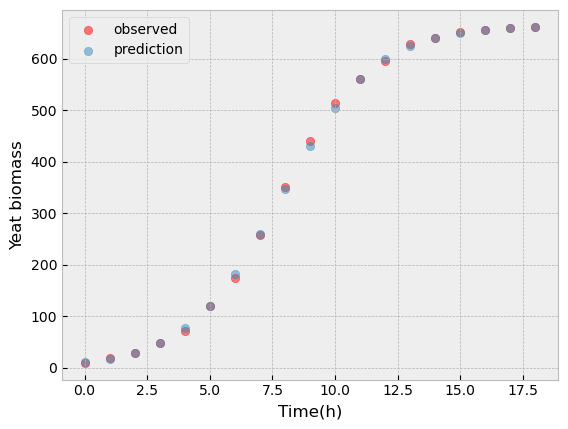

In [62]:
plt.scatter(time,P,alpha = 0.5,color = 'red',label = 'observed')
plt.scatter(time,P_pred,alpha=0.5,label ='prediction')
plt.xlabel('Time(h)')
plt.ylabel('Yeat biomass')
plt.legend() #给图像加图例
plt.show()

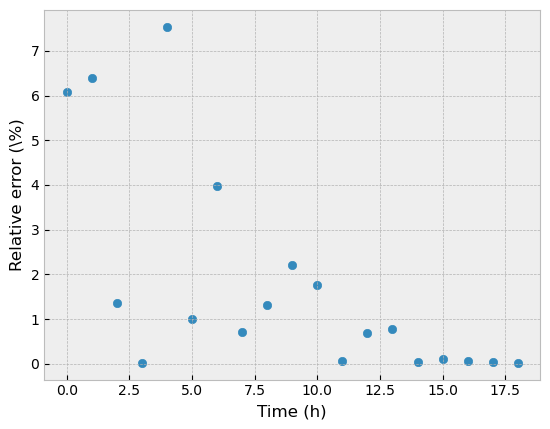

In [63]:
plt.scatter(time,np.abs((P-P_pred)/P)*100)
plt.xlabel("Time (h)")
plt.ylabel(r"Relative error (\%)")
plt.show()